In [85]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [86]:
df = pd.read_excel('/content/GameAddictionIMP.xlsx')
df

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,Rarely,Rarely,Rarely,Never,Sometimes,Rarely,Sometimes,Often,Never,Rarely,...,Rarely,Often,Rarely,65,50,Sometimes,Sometimes,Often,3.00-3.50,AIUB
1,Sometimes,Rarely,Somtimes,Rarely,Sometimes,Sometimes,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,72,89,Rarely,Rarely,Rarely,2.50-3.00,AIUB
2,Often,Often,Somtimes,Very Often,Often,Sometimes,Sometimes,Sometimes,Often,Sometimes,...,Sometimes,Often,Sometimes,61,70,Rarely,Sometimes,Sometimes,3.00-3.50,AIUB
3,Rarely,Sometimes,Somtimes,Never,Sometimes,Sometimes,Never,Very Often,Often,Rarely,...,Rarely,Rarely,Often,83,79,Rarely,Sometimes,Rarely,2.50-3.00,AIUB
4,Sometimes,Sometimes,Somtimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,...,Sometimes,Sometimes,Sometimes,72,89,Sometimes,Sometimes,Sometimes,2.50-3.00,AIUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Sometimes,Often,Often,Often,Often,Often,Often,Often,Often,Sometimes,...,Often,Sometimes,Sometimes,68,68,Rarely,Sometimes,Sometimes,2.50-3.00,BRAC
282,Sometimes,Often,Somtimes,Often,Often,Often,Often,Often,Sometimes,Sometimes,...,Sometimes,Rarely,Rarely,69,81,Rarely,Rarely,Rarely,2.50-3.00,BRAC
283,Often,Sometimes,Often,Often,Often,Often,Often,Often,Often,Sometimes,...,Sometimes,Sometimes,Rarely,67,66,Never,Sometimes,Rarely,2.50-3.00,BRAC
284,Sometimes,Rarely,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,...,Sometimes,Rarely,Rarely,67,77,Rarely,Sometimes,Rarely,2.50-3.00,BRAC


In [87]:
df.shape

(286, 31)

In [88]:
# Change string into numeric data value
df['thinkofPlayingGameDayLong'] = df['thinkofPlayingGameDayLong'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['spendFreeTimeonGame'] = df['spendFreeTimeonGame'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['feelingofGameAddiction'] = df['feelingofGameAddiction'].apply({'Never' : 1, 'Rarely' : 2, 'Somtimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['playingLongerThenIntended'] = df['playingLongerThenIntended'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['spendLargeTimeonGame'] = df['spendLargeTimeonGame'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unableToStopPlaying'] = df['unableToStopPlaying'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToForgetRealLife'] = df['gamingToForgetRealLife'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToReleaseStress'] = df['gamingToReleaseStress'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToFeelBetter'] = df['gamingToFeelBetter'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unableToReduceGaming'] = df['unableToReduceGaming'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unsuccessfulInfluenceofOthers'] = df['unsuccessfulInfluenceofOthers'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['angryIssue'] = df['angryIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['stressIssue'] = df['stressIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unsocialIssue'] = df['unsocialIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['fightIssue'] = df['fightIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['breakofRelationship'] = df['breakofRelationship'].apply({'Never' : 1, 'Rarely' : 2, 'Sometime' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToDeceive'] = df['tendToDeceive'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['sleepIssue'] = df['sleepIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToloseHobbies'] = df['tendToloseHobbies'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToNeglectImportantActivities'] = df['tendToNeglectImportantActivities'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['neckandBackPain'] = df['neckandBackPain'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['orthopedicIssues'] = df['orthopedicIssues'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['eyesightIssue'] = df['eyesightIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['hearingIssue'] = df['hearingIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToCocurricularActivities'] = df['tendToCocurricularActivities'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToPresentClass'] = df['tendToPresentClass'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToPeerInterraction'] = df['tendToPeerInterraction'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['Varsity'] = df['Varsity'].apply({'AIUB' : 1, 'ULAB' : 2,}.get)

In [89]:
df.head()

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,2,2,2,1,3,2,3,4,1,2,...,2,4,2,65,50,3,3,4,3.00-3.50,1.0
1,3,2,3,2,3,3,2,3,2,2,...,2,2,2,72,89,2,2,2,2.50-3.00,1.0
2,4,4,3,5,4,3,3,3,4,3,...,3,4,3,61,70,2,3,3,3.00-3.50,1.0
3,2,3,3,1,3,3,1,5,4,2,...,2,2,4,83,79,2,3,2,2.50-3.00,1.0
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,72,89,3,3,3,2.50-3.00,1.0


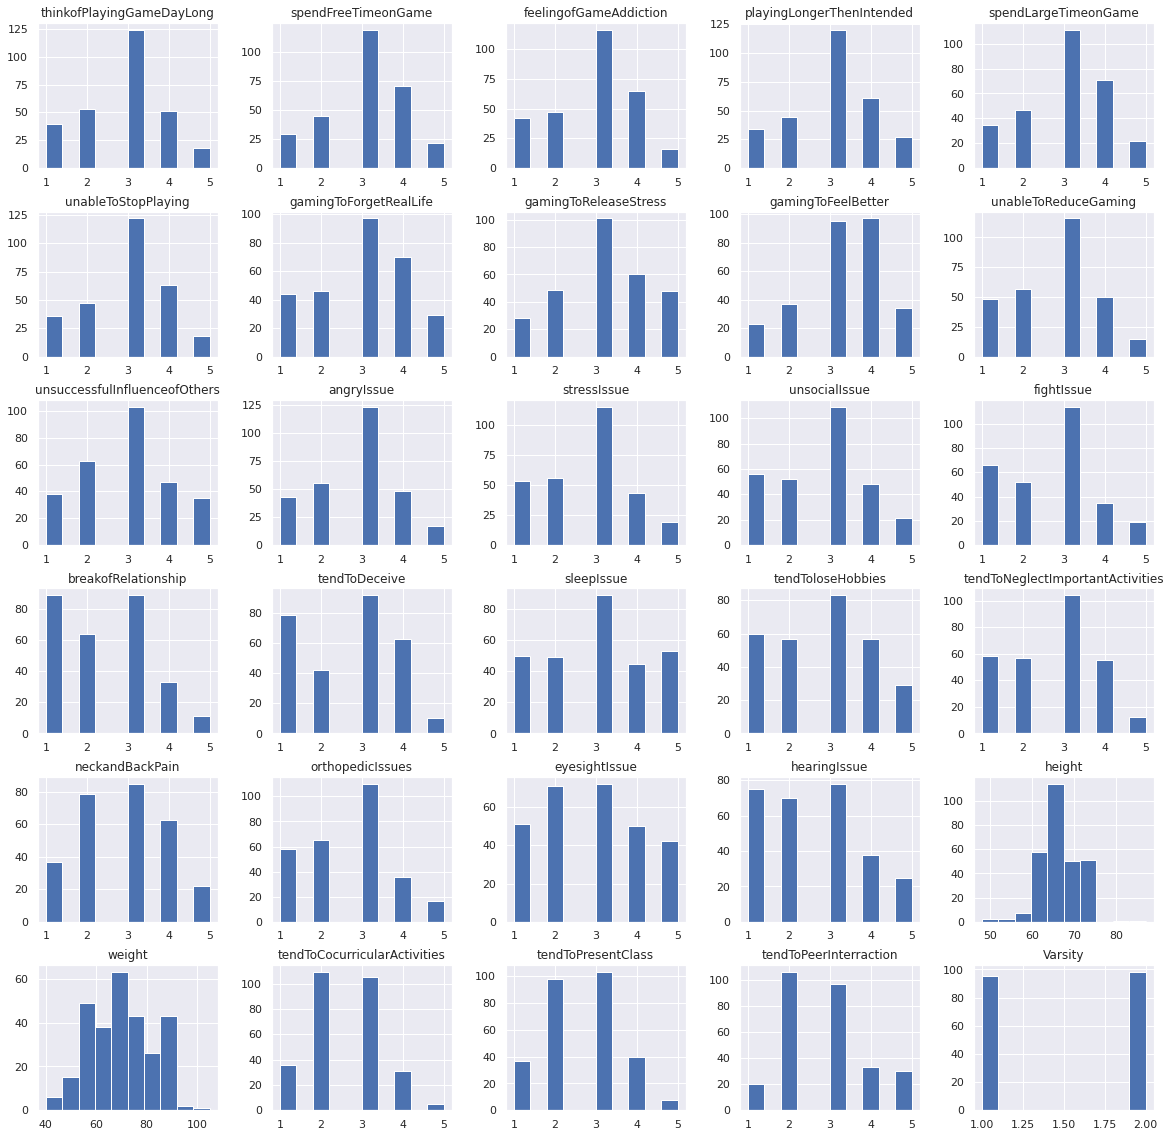

In [90]:
p = df.hist(figsize = (20,20))

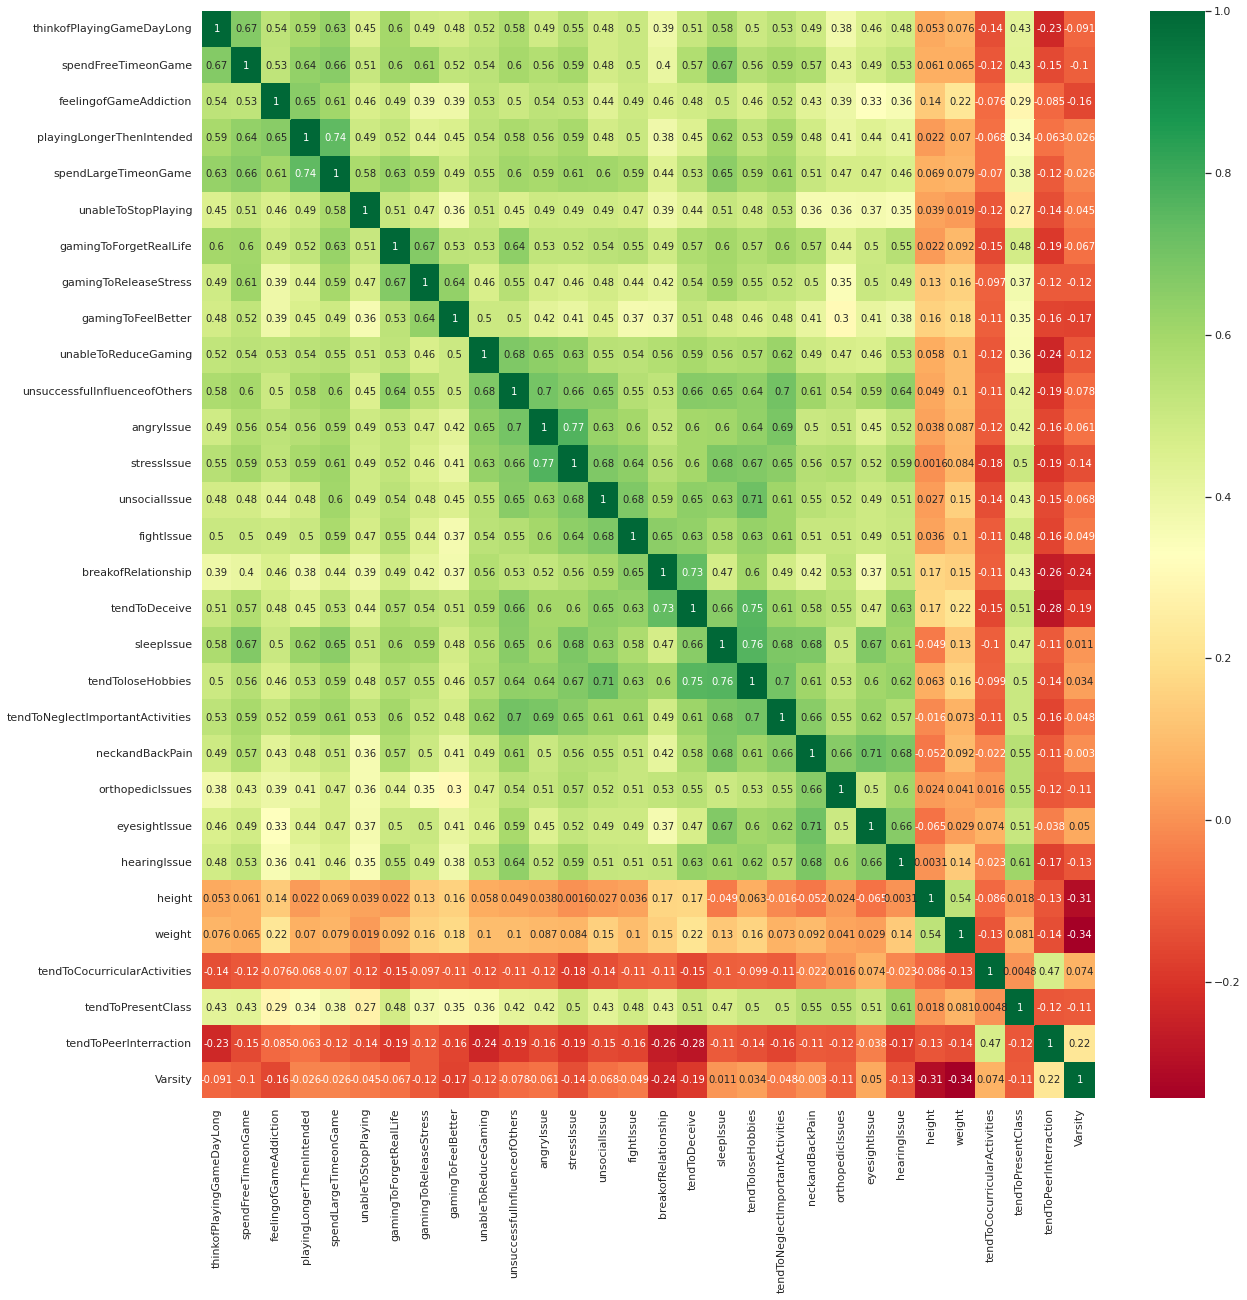

In [91]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [92]:
#physical Disorder Calculation
df['physicalDisorder']= df.iloc[:,[20,21,22,23]].sum(axis=1)
df.loc[:, 'physicalDisorder'] = np.where(df.physicalDisorder>=12, 1, 0)
df.head()
#0=not physical, 1=physical

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,physicalDisorder
0,2,2,2,1,3,2,3,4,1,2,...,4,2,65,50,3,3,4,3.00-3.50,1.0,0
1,3,2,3,2,3,3,2,3,2,2,...,2,2,72,89,2,2,2,2.50-3.00,1.0,0
2,4,4,3,5,4,3,3,3,4,3,...,4,3,61,70,2,3,3,3.00-3.50,1.0,1
3,2,3,3,1,3,3,1,5,4,2,...,2,4,83,79,2,3,2,2.50-3.00,1.0,0
4,3,3,3,3,3,3,3,3,3,3,...,3,3,72,89,3,3,3,2.50-3.00,1.0,1


In [93]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 286 entries, 0 to 285

Data columns (total 32 columns):

 #   Column                            Non-Null Count  Dtype  

---  ------                            --------------  -----  

 0   thinkofPlayingGameDayLong         286 non-null    int64  

 1   spendFreeTimeonGame               286 non-null    int64  

 2   feelingofGameAddiction            286 non-null    int64  

 3   playingLongerThenIntended         286 non-null    int64  

 4   spendLargeTimeonGame              286 non-null    int64  

 5   unableToStopPlaying               286 non-null    int64  

 6   gamingToForgetRealLife            286 non-null    int64  

 7   gamingToReleaseStress             286 non-null    int64  

 8   gamingToFeelBetter                286 non-null    int64  

 9   unableToReduceGaming              286 non-null    int64  

 10  unsuccessfulInfluenceofOthers     286 non-null    int64  

 11  angryIssue                        286 non-null    int64

In [94]:
x=df.iloc[:, 0:20]
y=df.iloc[:,31]
y

0      0
1      0
2      1
3      0
4      1
      ..
281    1
282    0
283    0
284    0
285    1
Name: physicalDisorder, Length: 286, dtype: int64

In [95]:
x.shape

(286, 20)

In [96]:
y.shape

(286,)

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [98]:
# NEURAL NETWORK

import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [99]:
# neural network with only one hidden layer (hidden units 100 but epochs 20) (BEST TRAINING ACCURACY)
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(20,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20

8/8 [==============================] - 0s 3ms/step - loss: 0.8834 - accuracy: 0.5833

Epoch 2/20

8/8 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6404

Epoch 3/20

8/8 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6184

Epoch 4/20

8/8 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.6886

Epoch 5/20

8/8 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6974

Epoch 6/20

8/8 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7149

Epoch 7/20

8/8 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7281

Epoch 8/20

8/8 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.6886

Epoch 9/20

8/8 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6754

Epoch 10/20

8/8 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6754

Epoch 11/20

8/8 [=

In [100]:
# training accuracy was .7851
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7931


[0.4655933976173401, 0.7931034564971924]